In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('CRData17.csv')
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
x = dataset.iloc[:,[5,9]].values
y = dataset.iloc[:,21].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
imputer = Imputer(missing_values= 'Nan', strategy='mean',axis = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
from sklearn.metrics import confusion_matrix #its a function not a class
cm = confusion_matrix(y_test,y_pred)
cm

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([[78,  0],
       [ 0, 14]])

In [2]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max()+1,step = 0.01),
                   np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max()+1,step = 0.01))

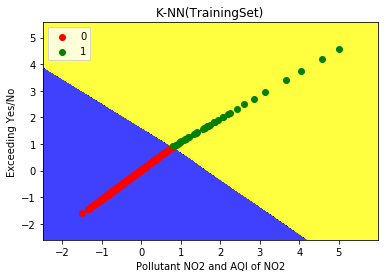

In [3]:
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, 
            cmap =ListedColormap(('blue','yellow')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN(TrainingSet)')
plt.xlabel('Pollutant NO2 and AQI of NO2')
plt.ylabel('Exceeding Yes/No')
plt.legend()
plt.show()

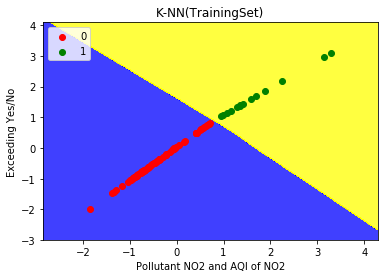

In [4]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max()+1,step = 0.01),
                   np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, 
            cmap =ListedColormap(('blue','yellow')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN(TrainingSet)')
plt.xlabel('Pollutant NO2 and AQI of NO2')
plt.ylabel('Exceeding Yes/No')
plt.legend()
plt.show()